In [1]:
import pandas as pd
import pymc3 as pm
from scipy.stats import pearsonr

# Load the Iris dataset
iris = pd.read_csv("iris.csv")

sepal_length = iris['SepalLengthCm']
petal_width = iris['PetalWidthCm']
petal_length = iris['PetalLengthCm']


# Pearson correlation coefficient
corr, _ = pearsonr(sepal_length, petal_width)
print(f"Pearson Correlation Coefficient Sepal Length: {corr}")
corr2, _ = pearsonr(petal_length, petal_width)
print(f"Pearson Correlation Coefficient for Petal Length: {corr2}")



WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Pearson Correlation Coefficient Sepal Length: 0.8179536333691635
Pearson Correlation Coefficient for Petal Length: 0.9627570970509675


In [2]:
# Petal Length has the highest absolute correlation as given by person correlation coefficient

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 92 seconds.
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
The acceptance probability does not match the target. It is 0.8861966964851438, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\ahmad\AppData\Local\Temp\ipykernel_14536\859862939.py:20: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_model

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.366,0.040,-0.443,-0.293,0.001,0.001,1593.0,1632.0,1.0
beta,0.416,0.010,0.398,0.434,0.000,0.000,1555.0,1617.0,1.0
sigma,0.209,0.012,0.186,0.232,0.000,0.000,2147.0,2165.0,1.0


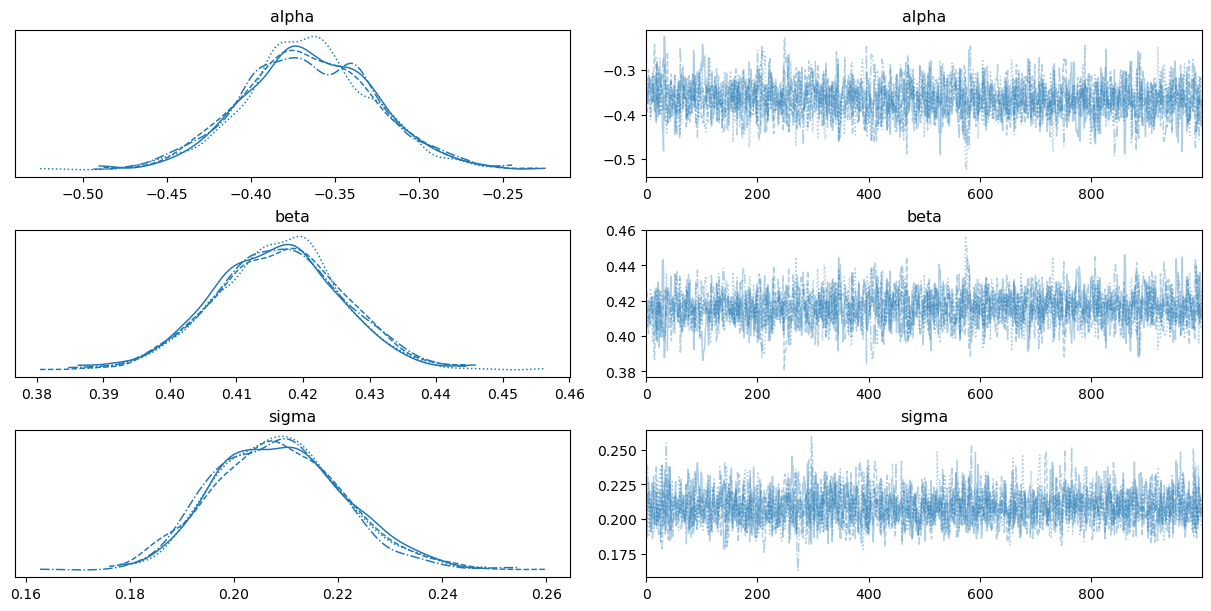

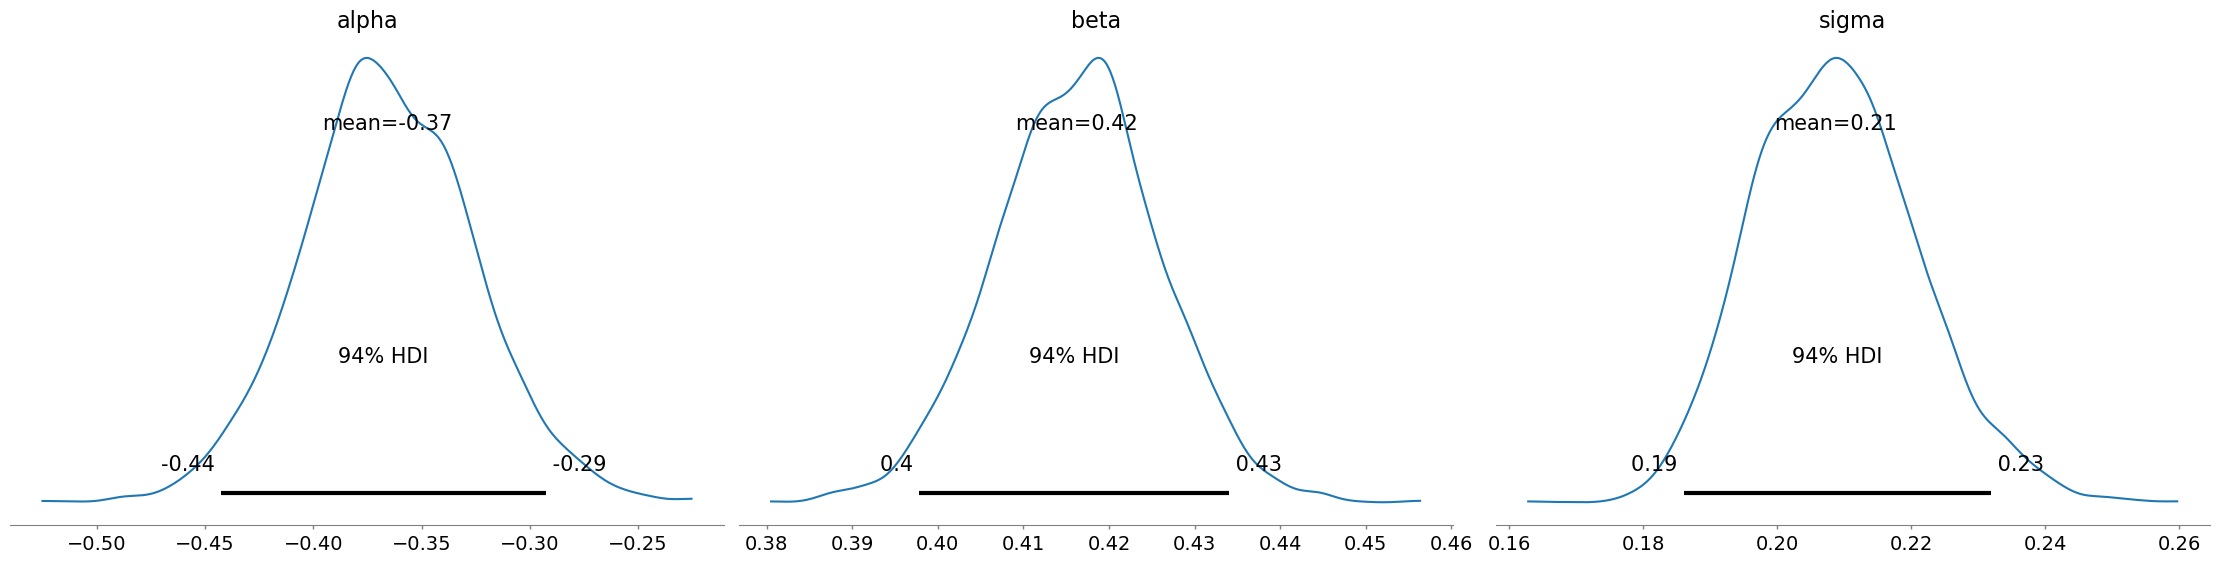

In [3]:
# Model 1
# Petal length as dependent variable (X) and Petal Width as dependent variable (Y)
alpha_model2=0
beta_model2=0
trace_model2=0
with pm.Model() as model2:
    # priors 
    alpha_model2 = pm.Normal('alpha', mu=0, sd=10)
    beta_model2 = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfCauchy('sigma', beta=10)

    # the linear regression model
    mu = alpha_model2 + beta_model2 * petal_length

    # the likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=petal_width)
    trace_model2 = pm.sample(1000, tune=2000)
# plotting the posterior inorder to see the distribution of the parameters
# and the traceplot to see the convergence of the parameters
pm.traceplot(trace_model2)
pm.plot_posterior(trace_model2)
#plotting the regression line

pm.summary(trace_model2)

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 69 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6674636006495377, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\ahmad\AppData\Local\Temp\ipykernel_14536\2103608711.py:21: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_model1)
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  war

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-3.195,0.260,-3.663,-2.698,0.008,0.006,1117.0,1283.0,1.0
beta,0.752,0.044,0.671,0.837,0.001,0.001,1102.0,1292.0,1.0
sigma,0.443,0.026,0.395,0.494,0.001,0.001,881.0,453.0,1.0


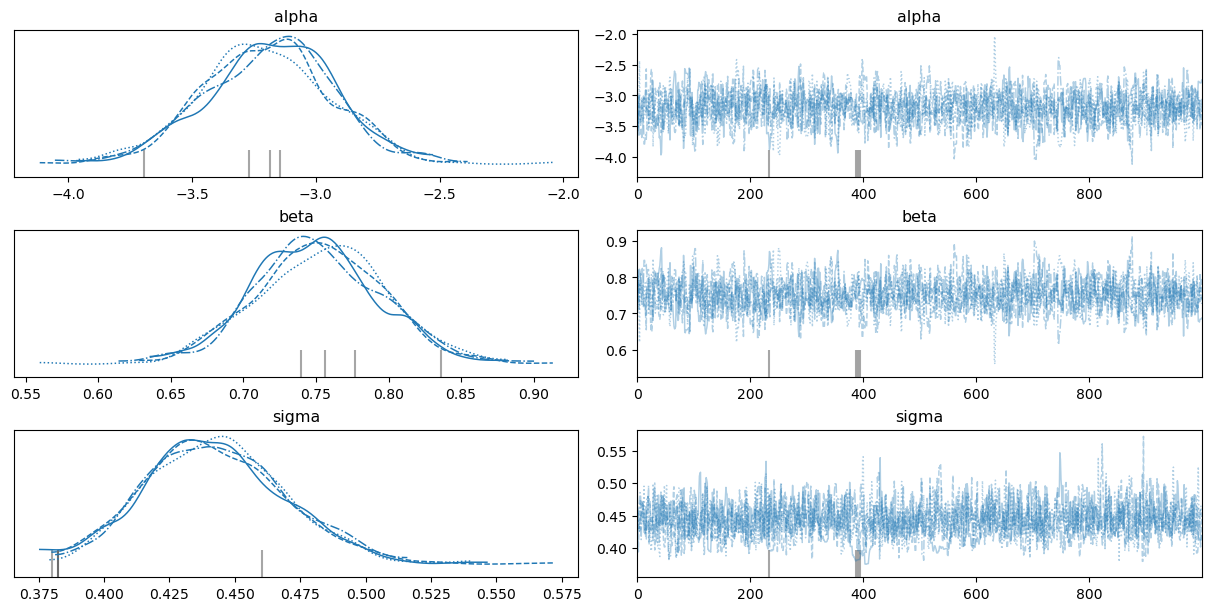

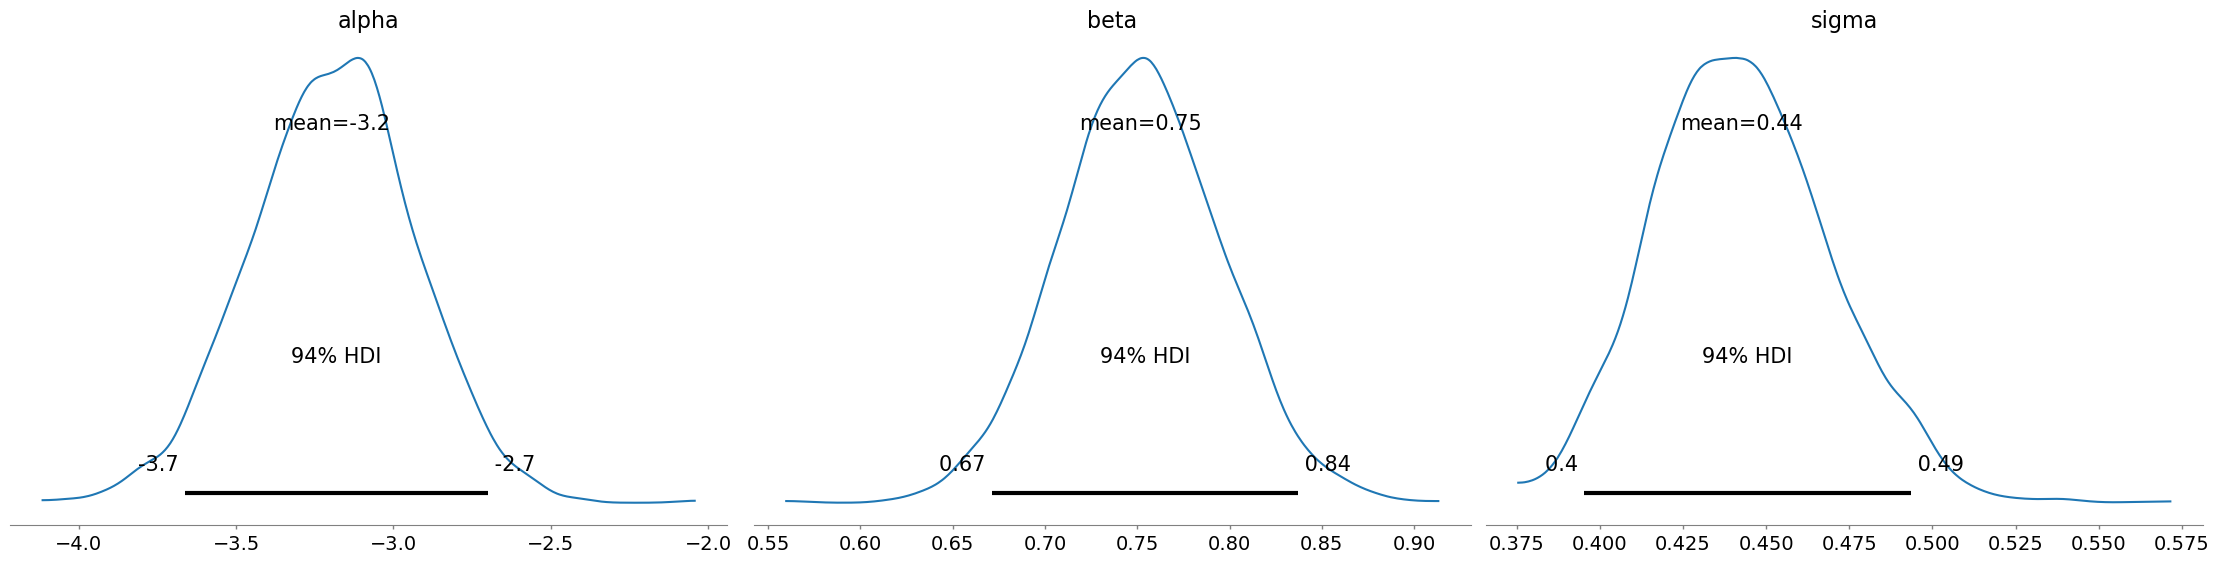

In [4]:
# Sepal Length as the independent variable (X) and Petal Width as the dependent variable (Y)
# Model 2
alpha_model1=0
beta_model1=0
trace_model1=0
with pm.Model() as model1:
    # priors 
    alpha_model1 = pm.Normal('alpha', mu=0, sd=10)
    beta_model1 = pm.Normal('beta', mu=0, sd=10)
    #sigma = pm.HalfNormal('sigma', sd=1)
    sigma = pm.HalfCauchy('sigma', beta=10)

    # the linear regression model
    mu = alpha_model1 + beta_model1 * sepal_length

    # the likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=petal_width)
    trace_model1 = pm.sample(1000, tune=2000)
# plotting the posterior inorder to see the distribution of the parameters
# and the traceplot to see the convergence of the parameters
pm.traceplot(trace_model1)
pm.plot_posterior(trace_model1)
pm.summary(trace_model1)


In [5]:
import numpy as np

# Predicted values for Model 1
predicted_values_model1 = np.array([trace_model1['alpha'][i] + trace_model1['beta'][i] * sepal_length for i in range(len(trace_model1['alpha']))])
mean_predicted_values_model1 = np.mean(predicted_values_model1, axis=0)

# Predicted values for Model 2
predicted_values_model2 = np.array([trace_model2['alpha'][i] + trace_model2['beta'][i] * petal_length for i in range(len(trace_model2['alpha']))])
mean_predicted_values_model2 = np.mean(predicted_values_model2, axis=0)

# R-squared values
R_squared1 = 1 - np.var(mean_predicted_values_model1 - petal_width) / np.var(petal_width)
R_squared2 = 1 - np.var(mean_predicted_values_model2 - petal_width) / np.var(petal_width)


if R_squared1 > R_squared2:
    print("Model 2 (Sepal Length as X) is a better fit for the data.")
    print(f"R-squared value for Model 2: {R_squared1}")
    print(f"R-squared value for Model 1: {R_squared1}\nIn comparison the Model 2 was a measly {R_squared2}")
else:
    print("Model 1 (Petal Length as X) is a better fit for the data.")
    print(f"R-squared value for Model 1: {R_squared2}\nIn comparison the Model 2 was a measly {R_squared1}")

Model 1 (Petal Length as X) is a better fit for the data.
R-squared value for Model 1: 0.9269010822369869
In comparison the Model 2 was a measly 0.6690439607516966
